In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 

In [2]:
df = pd.read_csv("Electric_Production.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.rename(columns={'DATE': 'Date','IPG2211A2N': 'Electric_Production'})
df = df.set_index(['Date'])
df

,Electric_Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [3]:
print("Median:   ", round(df.Electric_Production.median(), 3))
print("Mean:     ", round(df.Electric_Production.mean(), 3))
print("Variance: ", round(df.Electric_Production.var(), 3))
print("STD:      ", round(df.Electric_Production.std(), 3))

Median:    89.78
Mean:      88.847
Variance:  236.785
STD:       15.388


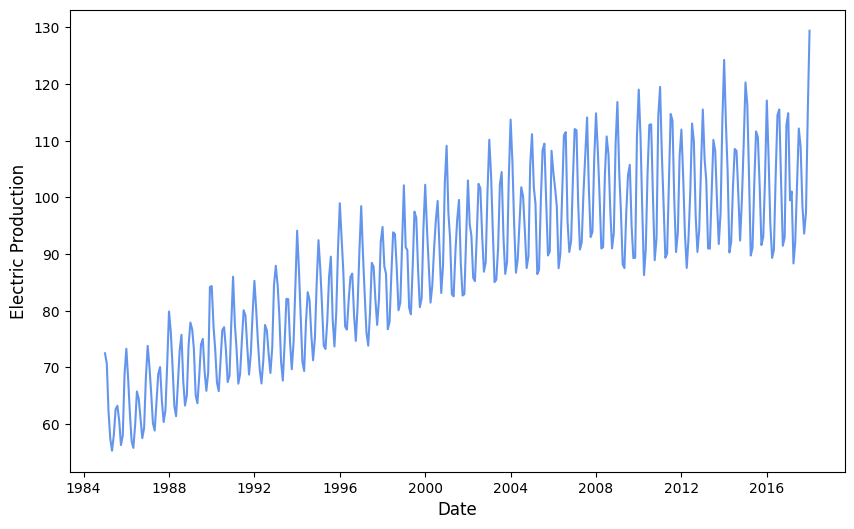

In [91]:
plt.figure(figsize = (10,6))
plt.plot(df['Electric_Production'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.show()

In [100]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Electric_Production'] < lower_bound.iloc[0]) | (df['Electric_Production'] > upper_bound.iloc[0])]
df_cleared = df[~df.index.isin(outliers.index)]
outliers

,Electric_Production
Date,


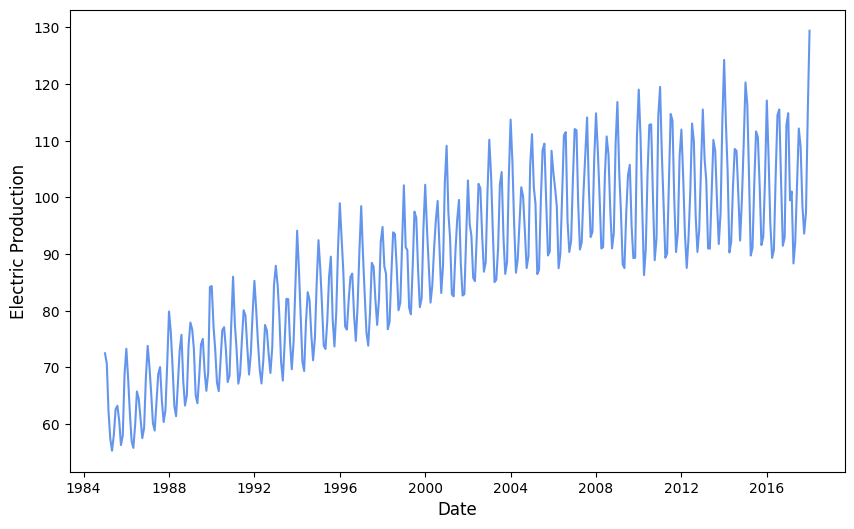

In [93]:
plt.figure(figsize = (10,6))
plt.plot(df_cleared['Electric_Production'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.show()

In [3]:
df_1 = pd.read_csv("electricityConsumptionAndProductioction.csv")
df_1

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61


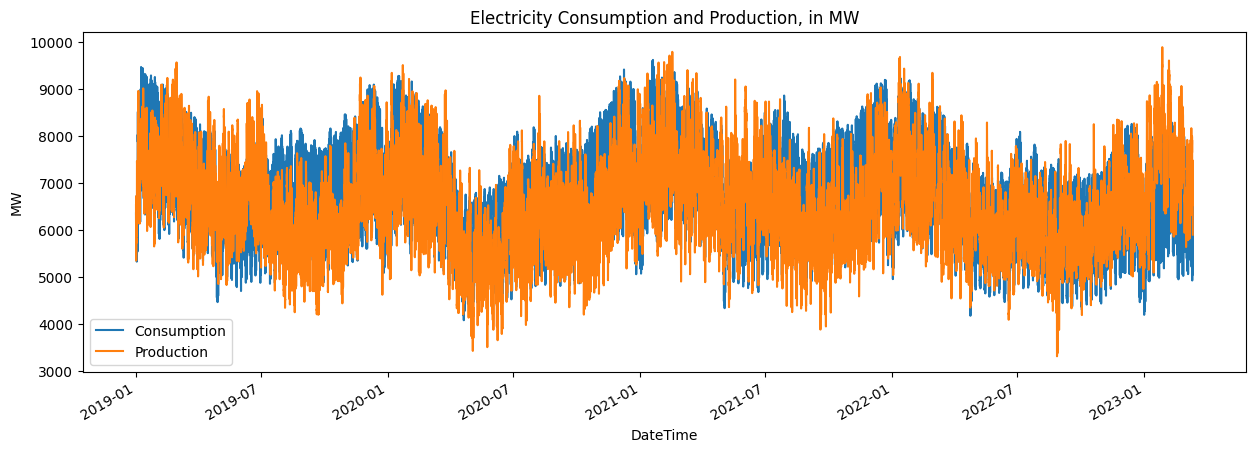

In [4]:
df_1 = df_1.set_index("DateTime")
df_1.index = pd.to_datetime(df_1.index)
df_1[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

In [194]:
print("Median:   ", round(df_1.Production.median(), 3))
print("Mean:     ", round(df_1.Production.mean(), 3))
print("Variance: ", round(df_1.Production.var(), 3))
print("STD:      ", round(df_1.Production.std(), 3))

Median:    6492.0
Mean:      6543.77
Variance:  1011002.349
STD:       1005.486


In [222]:
q1 = df_1.quantile(0.25)
q3 = df_1.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_1[(df_1['Production'] < lower_bound.iloc[1]) | (df_1['Production'] > upper_bound.iloc[1])]
df_cleared = df_1[~df_1.index.isin(outliers.index)]
outliers 

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-02-27 09:00:00,8691,9430,1371,2410,1338,1600,2381,268,60
2019-02-27 10:00:00,8570,9295,1387,2513,1459,1469,2005,398,62
2019-02-27 11:00:00,8481,9303,1385,2488,1501,1477,1957,433,61
2019-02-27 12:00:00,8443,9302,1346,2272,1520,1512,2135,453,61
2019-02-27 13:00:00,8433,9302,1361,2322,1404,1609,2155,386,62
...,...,...,...,...,...,...,...,...,...
2023-02-06 12:00:00,8091,9348,1334,2658,2148,1691,1061,399,55
2023-02-06 14:00:00,7889,9397,1356,2633,2270,1719,1024,329,63
2023-02-06 15:00:00,7803,9371,1369,2675,2289,1703,1059,206,67


In [228]:
outliers1 = df_1[(df_1['Consumption'] < lower_bound.iloc[0]) | (df_1['Consumption'] > upper_bound.iloc[0])]
outliers1

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,


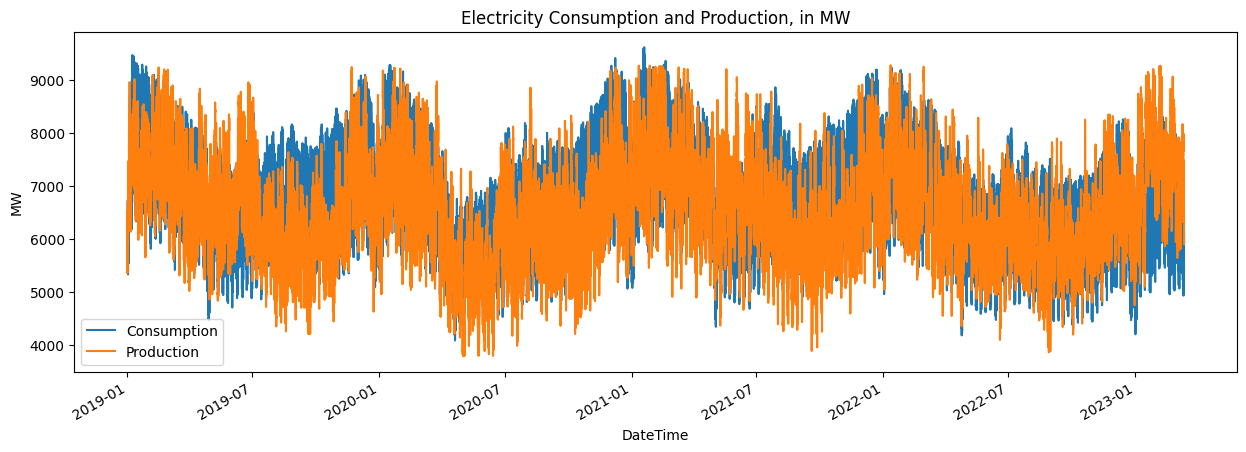

In [213]:
df_cleared1[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

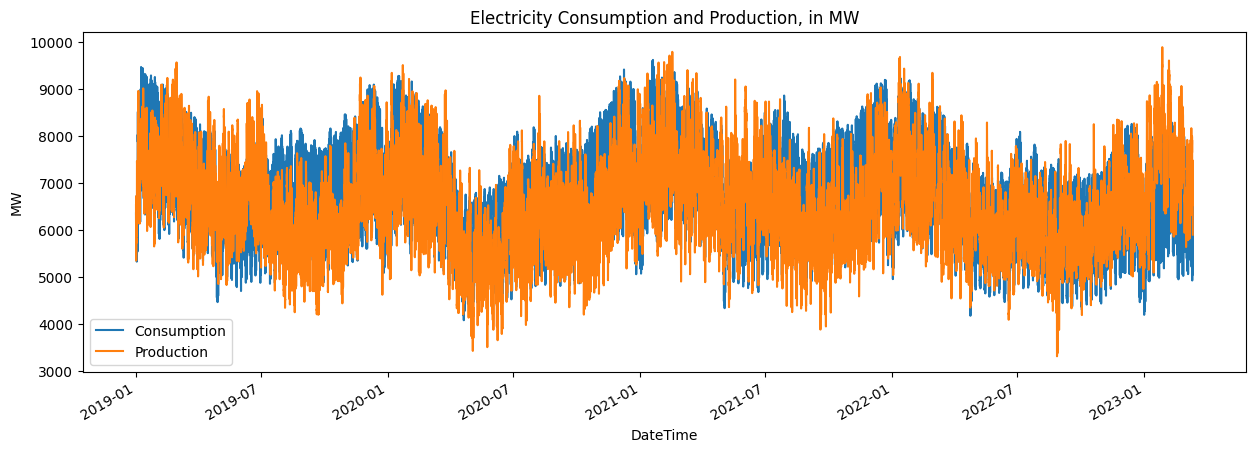

In [214]:
df_1[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()